---------------------------------------
Affichage données initiales            xclara.arff


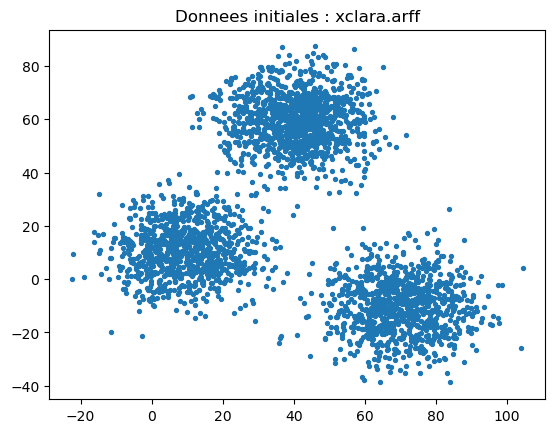

---------------------------------------
Affichage données initiales            square1.arff


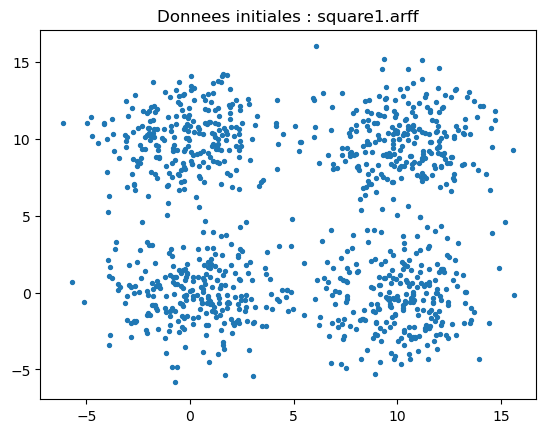

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.io import arff
from sklearn import cluster
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
import os

os.environ["OMP_NUM_THREADS"] = '4'
import warnings

# Suppress FutureWarning from KMeans
warnings.simplefilter(action='ignore', category=FutureWarning)
#path_out = './fig/'
def data_transform(filename):
    databrut = arff.loadarff(open(path+str(filename), 'r'))
    return np.array([[x[0],x[1]] for x in databrut[0]])

path ='/home/khira/Tp-Clustring/artificial/'
name1="xclara.arff"
name2="square1.arff"


# PLOT datanp (en 2D) - / scatter plot
# Extraire chaque valeur de features pour en faire une liste
# EX : 
# - pour t1=t[:,0] --> [1, 3, 5, 7]
# - pour t2=t[:,1] --> [2, 4, 6, 8]
names=[name1,name2]
for name in names:
    datanp= data_transform(name)
    print("---------------------------------------")
    print("Affichage données initiales            "+ str(name))
    f0 = datanp[:,0] # tous les élements de la première colonne
    f1 = datanp[:,1] # tous les éléments de la deuxième colonne

    #plt.figure(figsize=(6, 6))
    plt.scatter(f0, f1, s=8)
    plt.title("Donnees initiales : "+ str(name))
    #plt.savefig(path_out+"Plot-kmeans-code1-"+str(name)+"-init.jpg",bbox_inches='tight', pad_inches=0.1)
    plt.show()


------------------------------------------------------
Appel KMeans pour une valeur de k fixée


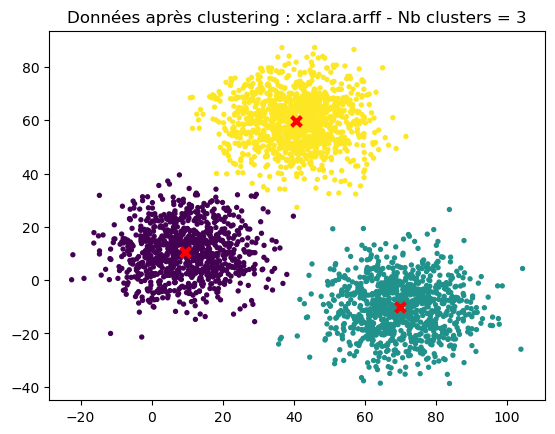

nb clusters = 3 , nb iter = 3 , inertie =  611605.880693389 , runtime =  66.4 ms


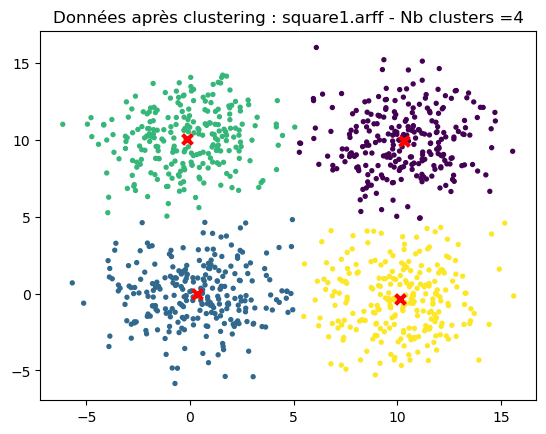

nb clusters = 4, nb iter = 4 , inertie =  8264.256320458277 , runtime =  347.0 ms


In [18]:
# Run clustering method for a given number of clusters
print("------------------------------------------------------")
print("Appel KMeans pour une valeur de k fixée")
tps1 = time.time()
datanp_xclara=data_transform(name1)
    
model = cluster.KMeans(n_clusters=3, init='k-means++', n_init=1)
model.fit(datanp_xclara)
tps2 = time.time()
labels_xclara = model.labels_
# informations sur le clustering obtenu
iteration = model.n_iter_
inertie = model.inertia_
centroids_xclara = model.cluster_centers_
#plt.figure(figsize=(6, 6))
f0 = datanp_xclara[:,0] # tous les élements de la première colonne
f1 = datanp_xclara[:,1] # tous les éléments de la deuxième colonne
plt.scatter(f0, f1, c= labels_xclara , s=8)
plt.scatter(centroids_xclara[:, 0],centroids_xclara[:, 1], marker="x", s=50, linewidths=3, color="red")
plt.title("Données après clustering : "+ str(name1) + " - Nb clusters = 3")
#plt.savefig(path_out+"Plot-kmeans-code1-"+str(name)+"-cluster.jpg",bbox_inches='tight', pad_inches=0.1)
plt.show()
print("nb clusters = 3 , nb iter =",iteration, ", inertie = ",inertie, ", runtime = ", round((tps2 - tps1)*1000,2),"ms")
#print("labels", labels)

datanp_square=data_transform(name2)
model = cluster.KMeans(n_clusters=4, init='k-means++', n_init=1)
model.fit(datanp_square)
tps2 = time.time()
labels_square = model.labels_
# informations sur le clustering obtenu
iteration = model.n_iter_
inertie = model.inertia_
centroids_square = model.cluster_centers_
#plt.figure(figsize=(6, 6))
f0 = datanp_square[:,0] # tous les élements de la première colonne
f1 = datanp_square[:,1] # tous les éléments de la deuxième colonne
plt.scatter(f0, f1, c=labels_square, s=8)
plt.scatter(centroids_square[:, 0],centroids_square[:, 1], marker="x", s=50, linewidths=3, color="red")
plt.title("Données après clustering : "+ str(name2) + " - Nb clusters =4")
#plt.savefig(path_out+"Plot-kmeans-code1-"+str(name)+"-cluster.jpg",bbox_inches='tight', pad_inches=0.1)
plt.show()
print("nb clusters = 4, nb iter =",iteration, ", inertie = ",inertie, ", runtime = ", round((tps2 - tps1)*1000,2),"ms")

In [24]:
print("les scores de regroupement de chaque cluster (distance minimale, maximale, moyenne entre les points d’un cluster et son centre)")
from sklearn.metrics.pairwise import euclidean_distances

def cluster_distance(k,dataset,labels,centroids):
    cluster_indices=[]
    distance=euclidean_distances(dataset,centroids)
    #clusters_points.append(dataset[labels == k])
    cluster_indices=np.where(labels==k)[0]
    distances_for_cluster=distance[cluster_indices,k]
    min_distance=np.min(distances_for_cluster)
    max_distance=np.max(distances_for_cluster)
    avg_distance=np.mean(distances_for_cluster)
    print(f"---------------------------Cluster{k+1}--------------------------------------")
    print("                                      ")
    print("mins = ",min_distance)
    print("maxs = ",max_distance)
    print("means = ",avg_distance)
        

def dist_min_inter_cluster(k, centroids):
    mins = []
    i = 0
    j = 1
    while i < k :
        if i == k-1 :
            mins.append(euclidean_distances(centroids[i].reshape(1,-1),centroids[0].reshape(1,-1)))
        else:
            mins.append(euclidean_distances(centroids[i].reshape(1,-1),centroids[j].reshape(1,-1)))
        i = j
        j = j+1
    return np.min(mins)

def dist_max_inter_cluster(k, centroids):
    maxs = []
    i = 0
    j = 1
    while i < k :
        if i == k-1 :
            maxs.append(euclidean_distances(centroids[i].reshape(1,-1),centroids[0].reshape(1,-1)))
        else:
            maxs.append(euclidean_distances(centroids[i].reshape(1,-1),centroids[j].reshape(1,-1)))
        i = j
        j = j+1
    return np.max(maxs)

def dist_mean_inter_cluster(k, centroids):
    means = []
    i = 0
    j = 1
    while i < k :
        if i == k-1 :
            means.append(euclidean_distances(centroids[i].reshape(1,-1),centroids[0].reshape(1,-1)))
        else:
            means.append(euclidean_distances(centroids[i].reshape(1,-1),centroids[j].reshape(1,-1)))
        i = j
        j = j+1
    return np.mean(means)
k=3
print("--------les scores de regroupement  et de separation pour le jeu de données:"+ str(name1)+ "---------------")

print("les scores de regroupement de chaque clusters")
for i in range(k):
    cluster_distance(i,datanp_xclara,labels_xclara,centroids_xclara)
print("---------------------------------------------------------------------------------") 

print("les scores de séparation entre les clusters")
    
print("min inter-cluster  = ",dist_min_inter_cluster(k, centroids_xclara))
print("max inter-cluster  = ",dist_max_inter_cluster(k, centroids_xclara))
print("mean inter-cluster = ",dist_mean_inter_cluster(k, centroids_xclara))

print("--------les scores de regroupement  et de separation pour le jeu de données:"+ str(name2)+ "---------------")

print("les scores de regroupement de chaque clusters")
k=4
for i in range(k):
    cluster_distance(i,datanp_square,labels_square,centroids_square)
print("---------------------------------------------------------------------------------")    
print("les scores de séparation entre les  clusters")
    
print("min inter-cluster  = ",dist_min_inter_cluster(k, centroids_square))
print("max inter-cluster  = ",dist_max_inter_cluster(k, centroids_square))
print("mean inter-cluster = ",dist_mean_inter_cluster(k, centroids_square))
                                        

les scores de regroupement de chaque cluster (distance minimale, maximale, moyenne entre les points d’un cluster et son centre)
--------les scores de regroupement  et de separation pour le jeu de données:xclara.arff---------------
les scores de regroupement de chaque clusters
---------------------------Cluster1--------------------------------------
                                      
mins =  0.2904903300623033
maxs =  37.21256190019523
means =  12.579820626841345
---------------------------Cluster2--------------------------------------
                                      
mins =  0.9412681980501666
maxs =  39.15351100489387
means =  13.036739611638613
---------------------------Cluster3--------------------------------------
                                      
mins =  0.44324656476472946
maxs =  32.40028103296846
means =  12.43904948679114
---------------------------------------------------------------------------------
les scores de séparation entre les clusters
min inter-clust

la méthode k-Means pour différentes valeurs de k
------------------------------------------------------


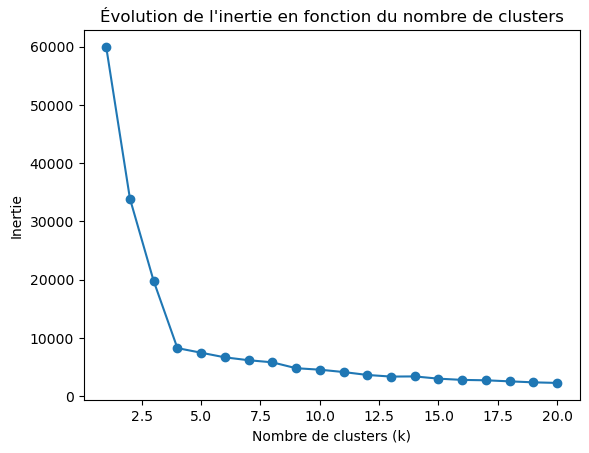

---------------------------Cluster3--------------------------------------
                                      
mins =  0.10418426130977121
maxs =  3.297319081002109
means =  1.3125848381616232
---------------------------------------------------------------------------------
les scores de séparation de chaque clusters
min inter-cluster  =  9.557152867715333
max inter-cluster  =  13.771620859319173
mean inter-cluster =  11.880847449979662


In [8]:
#################################### Question : 2.2 ######################################################
# Run clustering method for a given number of clusters
print("la méthode k-Means pour différentes valeurs de k")
print("------------------------------------------------------")
tps1 = time.time()
k=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
inerties= []
for i in k:
    model = cluster.KMeans(n_clusters=i, init='k-means++', n_init=1)
    model.fit(datanp)
    tps2 = time.time()
    labels = model.labels_
    # informations sur le clustering obtenu
    inertie = model.inertia_
    inerties.append(inertie)
    centroids = model.cluster_centers_
    
    
plt.plot(k,inerties, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Évolution de l\'inertie en fonction du nombre de clusters')
plt.show()
#Une bonne solution de clustering pour le dataset 'xclara.arff' est 3 parce que à partir le nombre de cluster égale à 3, on voit la courbe décroit lentement.
#regroupement
cluster_distance(2,datanp,labels,centroids)
print("---------------------------------------------------------------------------------")    
print("les scores de séparation de chaque clusters")
#séparation
print("min inter-cluster  = ",dist_min_inter_cluster(3, centroids))
print("max inter-cluster  = ",dist_max_inter_cluster(3, centroids))
print("mean inter-cluster = ",dist_mean_inter_cluster(3, centroids))

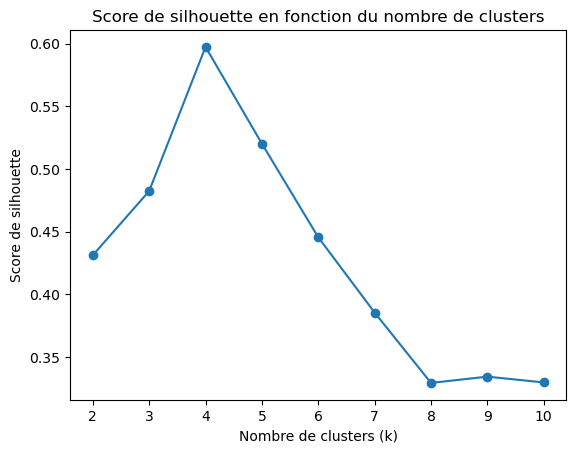

In [9]:
#################################### Question : 2.3 ###################################################### 
from sklearn.metrics import silhouette_score

k_values = range(2, 11)

silhouette_scores = []
execution_times = []

for k in k_values:
    start_time = time.time()

    # Ajustez le modèle KMeans
    kmeans = KMeans(n_clusters=k)
    kmeans_labels = kmeans.fit_predict(datanp)

    # Mesurez le temps de calcul
    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append(execution_time)

    # Calculez les scores de silhouette, Davies-Bouldin et Calinski-Harabasz
    silhouette = silhouette_score(datanp, kmeans_labels)
    silhouette_scores.append(silhouette)
    
# Maintenant, tracez le score de silhouette en fonction de k
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette en fonction du nombre de clusters')
plt.show()
#la bonne solution est : k=3

    

Affichage données initiales de dataset et l'affichage de score de silhouette en fonction du nombre de clusters            


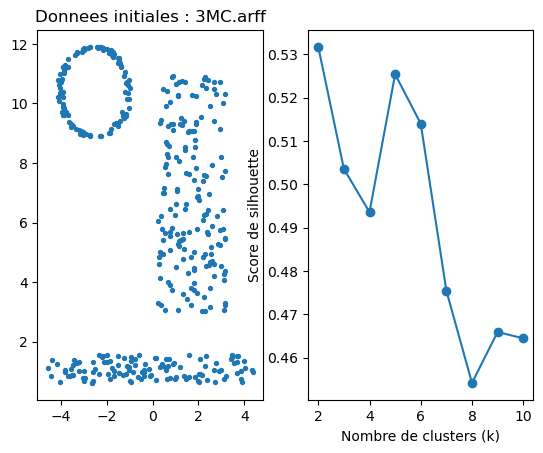

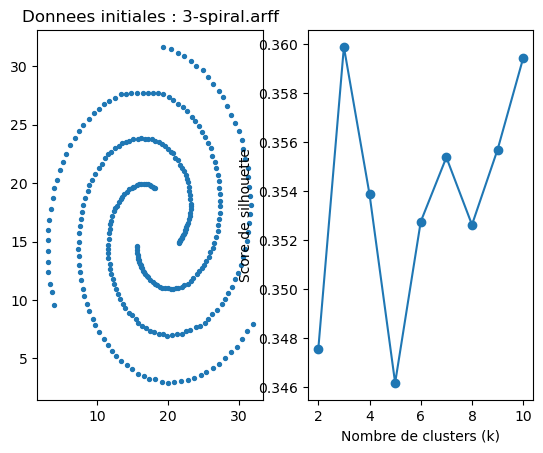

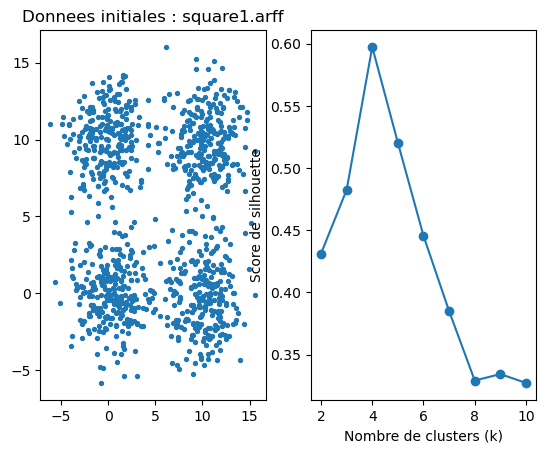

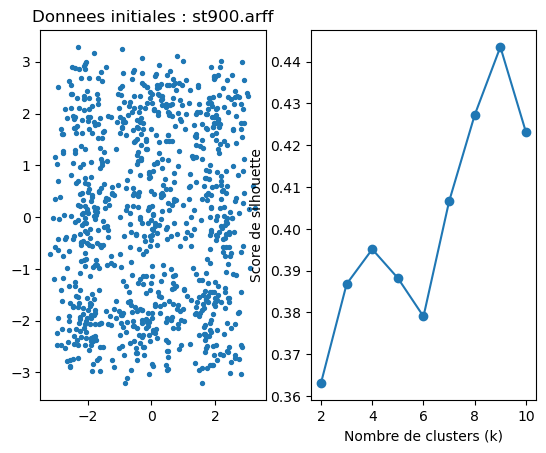

In [10]:
# fonction qui permet de transformer un dataset en un tableau de deux dimention
def data_transform(filename):
    databrut = arff.loadarff(open(path+str(filename), 'r'))
    return np.array([[x[0],x[1]] for x in databrut[0]])

path ='/home/khira/Tp-Clustring/artificial/'
name1="3MC.arff"
name2="3-spiral.arff"
name3="square1.arff"
name4 ="st900.arff"

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

k_values = range(2, 11)
data_names=[name1,name2,name3,name4]
silhouette_scores = []
execution_times = []
print("Affichage données initiales de dataset et l'affichage de score de silhouette en fonction du nombre de clusters            ")
for name in data_names:
    for k in k_values:
        data=data_transform(name)
        start_time = time.time()
        # Ajustez le modèle KMeans
        kmeans = KMeans(n_clusters=k)
        kmeans_labels = kmeans.fit_predict(data)

        # Mesurez le temps de calcul
        end_time = time.time()
        execution_time = end_time - start_time
        execution_times.append(execution_time)

        # Calculez les scores de silhouette, Davies-Bouldin et Calinski-Harabasz
        silhouette = silhouette_score(data, kmeans_labels)
        silhouette_scores.append(silhouette)    
    
    f0 = data[:,0] # tous les élements de la première colonne
    f1 = data[:,1] # tous les éléments de la deuxième colonne
    plt.subplot(1, 2, 1)
    plt.scatter(f0, f1, s=8)
    plt.title("Donnees initiales : "+ str(name))
    
    # Maintenant, tracez le score de silhouette en fonction de k
    plt.subplot(1, 2, 2)
    plt.plot(range(2, 11), silhouette_scores, marker='o')
    plt.xlabel('Nombre de clusters (k)')
    plt.ylabel('Score de silhouette')
    plt.show()
    silhouette_scores = []


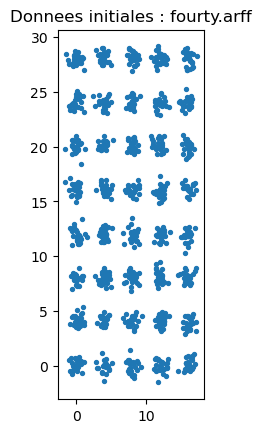

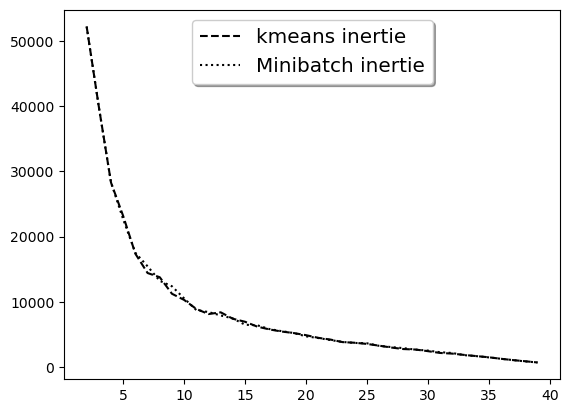

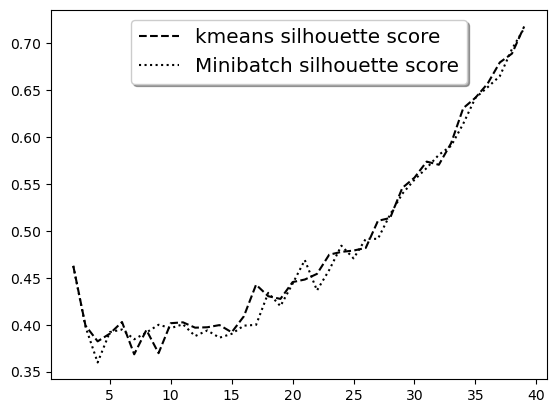

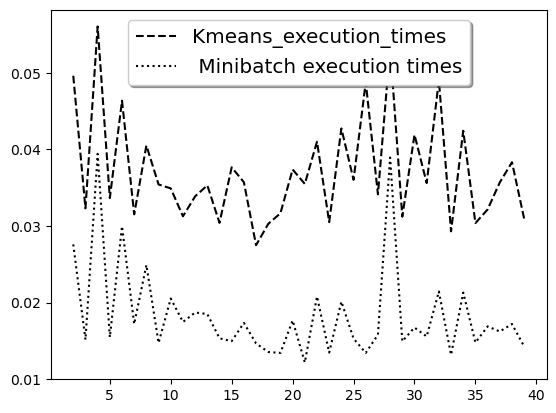

In [15]:
#################################### Question : 2.5 ######################################################
from sklearn.cluster import MiniBatchKMeans
names=["fourty.arff"]
k_values = range(2, 40)
Kmeans_execution_times = []
Minibatch__execution_times = []

def k_means_inertia(k_list,dataset):
    inertias = []
    for i in k_list:
        model = cluster.KMeans(n_clusters=i, init='k-means++', n_init=1)
        model.fit(dataset)
        inertias.append(model.inertia_)
    return inertias
def k_means_silh(k_list,dataset):
    silhs = []
    for i in k_list:
        modele = cluster.KMeans(n_clusters=i, init='k-means++', n_init=1)
        modele.fit(dataset)
        silhs.append(metrics.silhouette_score(dataset,modele.labels_,metric='euclidean'))
    return silhs
def batchmin_inertia(k_list,dataset):
    inertias = []
    for i in k_list:
        model = cluster.MiniBatchKMeans(n_clusters=i, init='k-means++', n_init=1)
        model.fit(dataset)
        inertias.append(model.inertia_)
    return inertias
def batchmin_silh(k_list,dataset):
    silhs = []
    for i in k_list:
        modele = cluster.MiniBatchKMeans(n_clusters=i, init='k-means++', n_init=1)
        modele.fit(dataset)
        silhs.append(metrics.silhouette_score(dataset,modele.labels_,metric='euclidean'))
    return silhs
    
for name in names:
    for k in k_values:
        data=data_transform(name)
        start_time = time.time()
        # Ajustez le modèle MiniBatchKMeans
        # Paramètres du MiniBatchKMeans
        batch_size = 50
        n_clusters = k
        max_iter = 100

        # Initialisation du modèle
        model =MiniBatchKMeans(n_clusters=i, init='k-means++', n_init=1)
        minibatch_kmeans_labels = model.fit_predict(data)
        # Mesurez le temps de calcul
        end_time = time.time()
        execution_time1 = end_time - start_time
        Minibatch__execution_times.append(execution_time1)
        # Ajustez le modèle KMeans
        
        model =MiniBatchKMeans(n_clusters=i, init='k-means++', n_init=1)
        minibatch_kmeans_labels = model.fit_predict(data)
        # Mesurez le temps de calcul
        end_time = time.time()
        execution_time2 = end_time - start_time
        Kmeans_execution_times.append(execution_time2)

    f0 = data[:,0] # tous les élements de la première colonne
    f1 = data[:,1] # tous les éléments de la deuxième colonne
    plt.subplot(131)
    plt.scatter(f0, f1, s=8)
    plt.title("Donnees initiales : "+ str(name))
    # afficher l'évolution du centre d'inertie
    fig, ax = plt.subplots()
    ax.plot(k_values, k_means_inertia(k_values,data), 'k--', label='kmeans inertie')
    ax.plot(k_values, batchmin_inertia(k_values,data), 'k:', label='Minibatch inertie')
    legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')
    plt.show()
    # afficher l'évolution du scores de silhouette
    fig, ax = plt.subplots()
    ax.plot(k_values, k_means_silh(k_values,data), 'k--', label='kmeans silhouette score')
    ax.plot(k_values, batchmin_silh(k_values,data), 'k:', label='Minibatch silhouette score')
    legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')
    plt.show()
    # afficher l'évolution du temps d'execusions
    fig, ax = plt.subplots()
    ax.plot(k_values, Kmeans_execution_times , 'k--', label='Kmeans_execution_times')
    ax.plot(k_values, Minibatch__execution_times , 'k:', label=' Minibatch execution times')
    legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')
    plt.show()
    
    